
In the United States, the flu season is considered October through May. It typically reaches an apex in February. While seasonal influenza (flu) viruses can be detected year-round in the United States, flu viruses are most common during the fall and winter. The exact timing and duration of flu seasons can vary, but influenza activity often begins to increase in October. Most of the time flu activity peaks between December and February, although activity can last as late as May.

In [106]:

command_str = '{sys.executable} -m pip install --upgrade svgpathtools'.format(sys=sys)
print(command_str)
!{command_str}

C:\Users\577342\AppData\Local\Continuum\anaconda3\python.exe -m pip install --upgrade svgpathtools
Requirement already up-to-date: svgpathtools in c:\users\577342\appdata\local\continuum\anaconda3\lib\site-packages (1.3.3)


In [1]:

import sys

# Insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../py')

In [2]:

%run ../../load_magic/storage.py
%run ../../load_magic/paths.py
%run ../../load_magic/lists.py
%run ../../load_magic/environment.py
%run ../../load_magic/dataframes.py

import scraping_utils
wikipedia = scraping_utils.wikipedia

from bs4 import BeautifulSoup as bs
import networkx as nx
import re
import urllib.request

notebook_path = get_notebook_path()
print(notebook_path)
s = Storage()
#pandemic_df = s.load_object('pandemic_df')
print(['s.{}'.format(fn) for fn in dir(s) if not fn.startswith('_')])

%pprint
dir()

D:\Documents\Repositories\notebooks\covid19\ipynb\Flu Season.ipynb
['s.attempt_to_pickle', 's.data_csv_folder', 's.data_folder', 's.encoding_type', 's.load_csv', 's.load_dataframes', 's.load_object', 's.save_dataframes', 's.saves_csv_folder', 's.saves_folder', 's.saves_pickle_folder', 's.store_objects']
Pretty printing has been turned OFF


['Config', 'In', 'Out', 'RandomForestClassifier', 'SequenceMatcher', 'Storage', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__nonzero__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i2', '_ih', '_ii', '_iii', '_oh', 'bs', 'check_4_doubles', 'check_for_typos', 'conjunctify_list', 'copyfile', 'csv', 'encoding', 'example_iterrows', 'exit', 'filepath_regex', 'get_classifier', 'get_column_descriptions', 'get_data_structs_dataframe', 'get_datastructure_prediction', 'get_dir_tree', 'get_git_lfs_track_commands', 'get_importances', 'get_input_sample', 'get_ipython', 'get_max_rsquared_adj', 'get_module_version', 'get_notebook_path', 'get_page_tables', 'get_specific_gitignore_files', 'get_struct_name', 'humanize_bytes', 'io', 'ipykernel', 'json', 'jupyter_config_dir', 'math', 'notebook_path', 'notebookapp', 'nx', 'os', 'pd', 'pickle', 'plt', 'preprocess_data', 'print_all_files_ending_starting_with', 'print_all_files_ending_with', 'print_all_files_st

In [73]:

from datetime import date

usa_df = s.load_object('usa_df')
qr_column = 'Deaths_New'
qe_column = 'doy'
columns_list = [qr_column, 'Date']
df = usa_df[columns_list].dropna(axis='index', how='any')
df[qe_column] = df.Date.map(lambda ts: ts.dayofyear)
df.Date = df.Date.map(lambda ts: date(ts.year, ts.month, ts.day))
df['woy'] = df.Date.map(lambda d: d.isocalendar()[1])
df.set_index('Date', drop=True, inplace=True)
df.Deaths_New = df.Deaths_New.fillna(0)

In [74]:

print(['df.index.{}'.format(fn) for fn in dir(df.index) if 'ser' in fn.lower()])

['df.index._assert_can_do_op', 'df.index._assert_can_do_setop', 'df.index._assert_take_fillable', 'df.index.insert', 'df.index.to_series']


In [75]:

df['rolling_sum'] = df.Deaths_New.rolling(7).sum()
#rolling_df['woy'] = rolling_df.index.map(lambda d: d.isocalendar()[1]).values
df

,Deaths_New,doy,woy,rolling_sum
Date,,,,
2020-02-29,1.0,60,9,NaN
2020-03-01,1.0,61,9,NaN
2020-03-02,4.0,62,10,NaN
2020-03-03,3.0,63,10,NaN
2020-03-04,2.0,64,10,NaN
2020-03-06,3.0,66,10,NaN
2020-03-07,5.0,67,10,19.0
2020-03-08,2.0,68,10,20.0
2020-03-09,5.0,69,11,24.0


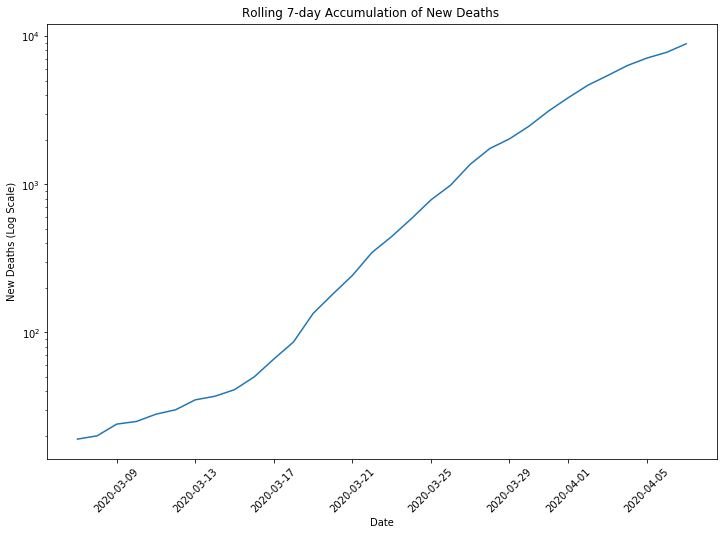

In [39]:

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ylabel_text = plt.ylabel('New Deaths (Log Scale)')
xlabel_text = plt.xlabel('Date')
suptitle_text = plt.suptitle(t='Rolling 7-day Accumulation of New Deaths', x=0.5, y=0.91)
ax.set_yscale('log')
AxesSubplot_obj = df.Deaths_New.rolling(7).sum().plot.line(rot=45, ax=ax)

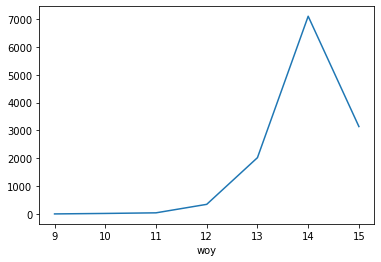

In [7]:

AxesSubplot_obj = df.groupby('woy').Deaths_New.sum().plot.line()

In [101]:

df.groupby('woy').Deaths_New.sum()

woy
9        2.0
10      19.0
11      41.0
12     346.0
13    2023.0
14    7103.0
Name: Deaths_New, dtype: float64

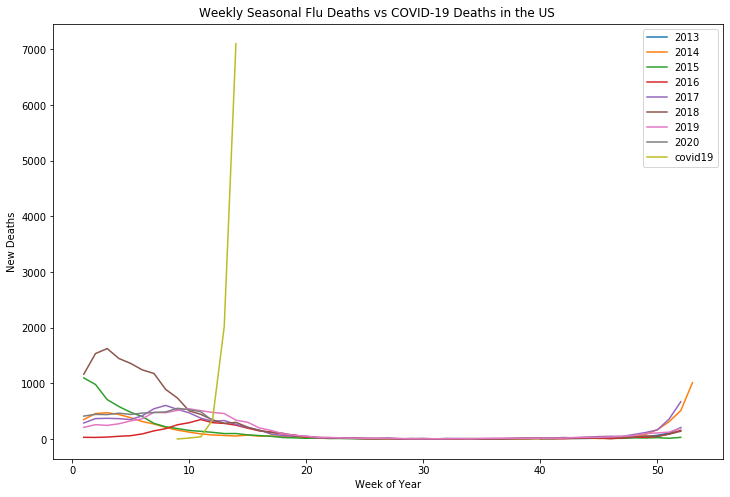

In [103]:

# https://www.cdc.gov/flu/weekly/index.htm
# https://www.cdc.gov/flu/weekly/weeklyarchives2019-2020/data/NCHSData13.csv
flu_deaths_df = s.load_csv('NCHSData13')
year_list = flu_deaths_df.Year.unique().tolist()
flu_deaths_df.set_index('Week', drop=True, inplace=True)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
suptitle_text = plt.suptitle(t='Weekly Seasonal Flu Deaths vs COVID-19 Deaths in the US', x=0.5, y=0.91)
for year in year_list:
    mask_series = (flu_deaths_df.Year == year)
    AxesSubplot_obj = flu_deaths_df[mask_series]['Influenza Deaths'].plot.line(ax=ax, label=year)
AxesSubplot_obj = df.groupby('woy').Deaths_New.sum()[:-1].plot.line(ax=ax, label='covid19')
legend_obj = plt.legend()
ylabel_text = plt.ylabel('New Deaths')
xlabel_text = plt.xlabel('Week of Year')

In [10]:

flu_deaths_df.columns

Index(['Year', 'Week', 'Percent of Deaths Due to Pneumonia and Influenza',
       'Expected', 'Threshold', 'All Deaths', 'Pneumonia Deaths',
       'Influenza Deaths'],
      dtype='object')

In [57]:

def get_doubling_days(count_yesterday, count_today):
    growth_rate = (count_today-count_yesterday)/count_today
    doubling_time = math.log(2)/growth_rate
    
    return doubling_time

In [62]:

count_today = usa_df.loc[52, 'Deaths_New']
count_yesterday = usa_df.loc[51, 'Deaths_New']
get_doubling_days(count_yesterday, count_today)

1.866463357708903

In [65]:

count_today = usa_df.loc[52, 'Confirmed_New']
count_yesterday = usa_df.loc[51, 'Confirmed_New']
get_doubling_days(count_yesterday, count_today)

15.335008702575136

In [89]:

df.iloc[0].name

datetime.date(2020, 2, 29)

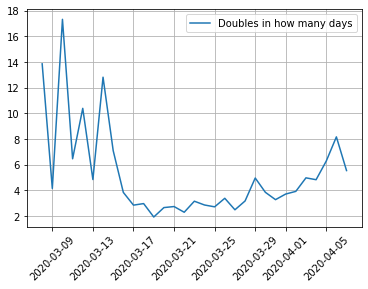

In [99]:

doubling_days_list = []
date_list = []
for i in range(df.shape[0]):
    try:
        date_today = df.iloc[i].name
        date_list.append(date_today)
        count_today = df.iloc[i]['rolling_sum']
        count_yesterday = df.iloc[i-1]['rolling_sum']
        doubling_days = get_doubling_days(count_yesterday, count_today)
        doubling_days_list.append(doubling_days)
    except Exception as e:
        pass
doubling_df = pd.DataFrame(doubling_days_list, index=date_list).dropna(axis='index', how='any')
doubling_df.columns = ['Doubles in how many days']
AxesSubplot_obj = doubling_df.plot.line(rot=45, grid=True)

In [107]:

# Created Path object using a d-string
from svgpathtools import parse_path
import xml.etree.ElementTree as et

file_path = os.path.join(s.data_folder, 'svg', 'hiv_deaths.svg')
root = et.parse(file_path).getroot()
for g_elem in root:
    id = g_elem.attrib['id']
    if (id == 'layer1'):
        for path_elem in g_elem:
            outline_d = path_elem.attrib['d']
            path_obj = parse_path(outline_d)
            break
        break

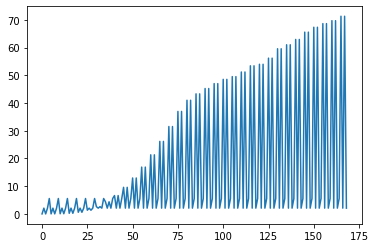

In [132]:

line_list = []
for line_obj in path_obj:
    line_list.append(line_obj.length())
length_series = pd.Series(line_list)
AxesSubplot_obj = length_series.plot.line()

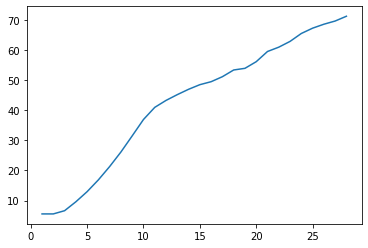

In [151]:

rolling_max = length_series.rolling(5).max()
rolling_max.drop_duplicates(keep='last', inplace=True)
rolling_max = rolling_max.reset_index(level=0, inplace=False, drop=True)
AxesSubplot_obj = rolling_max.plot.line()

In [213]:

from datetime import date

base = 200 - rolling_max.iloc[8]
hiv_deaths_series = rolling_max.map(lambda x: x + base)
hiv_deaths_series.index = hiv_deaths_series.index.map(lambda x: date(year=x+1984, month=1, day=1))

In [214]:

import numpy as np

for idx in range(1, len(hiv_deaths_series.index)-1):
    for ord in np.linspace(hiv_deaths_series.index[idx].toordinal(), hiv_deaths_series.index[idx+1].toordinal(), 52)[1:-1]:
        hiv_deaths_series.loc[date_obj.fromordinal(int(ord))] = np.nan
hiv_deaths_series = hiv_deaths_series.sort_index().interpolate(axis='index', limit_area='inside', inplace=False).dropna(axis='index', how='any')

In [217]:

hiv_deaths_series

1985-01-01    179
1985-01-08    179
1985-01-15    179
1985-01-22    179
1985-01-29    179
             ... 
2011-12-03    245
2011-12-10    245
2011-12-17    245
2011-12-24    245
2012-01-01    245
Length: 1378, dtype: int64

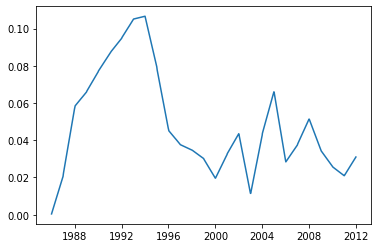

In [221]:

AxesSubplot_obj = hiv_deaths_series.diff().rolling(52).mean().plot.line()

In [117]:

first_line = path_obj[0]
print(['first_line.{}'.format(fn) for fn in dir(first_line) if not fn.startswith('_')])
print(first_line.length())
start_point = first_line.start
print(['start_point.{}'.format(fn) for fn in dir(start_point) if not fn.startswith('_')])
start_point.imag
first_line.ilength?

['first_line.bbox', 'first_line.bpoints', 'first_line.cropped', 'first_line.curvature', 'first_line.derivative', 'first_line.end', 'first_line.ilength', 'first_line.intersect', 'first_line.joins_smoothly_with', 'first_line.length', 'first_line.normal', 'first_line.point', 'first_line.poly', 'first_line.radialrange', 'first_line.reversed', 'first_line.rotated', 'first_line.scaled', 'first_line.split', 'first_line.start', 'first_line.translated', 'first_line.unit_tangent']
0.002999999999985903
['start_point.conjugate', 'start_point.imag', 'start_point.real']


Signature: first_line.ilength(s, s_tol=1e-12, maxits=10000, error=1e-12, min_depth=5)
Docstring:
Returns a float, t, such that self.length(0, t) is approximately s.
See the inv_arclength() docstring for more details.
File:      c:\users\577342\appdata\local\continuum\anaconda3\lib\site-packages\svgpathtools\path.py
Type:      method


In [108]:

path_obj

Path(Line(start=(15.381273+285.01639j), end=(15.381273+285.01339j)),
     Line(start=(15.381273+285.01339j), end=(17.464863+285.01339j)),
     Line(start=(17.464863+285.01339j), end=(17.464863+285.01639j)),
     Line(start=(17.464863+285.01639j), end=(15.381273+285.01639j)),
     Line(start=(15.381273+285.01639j), end=(20.937523+285.01639j)),
     Line(start=(20.937523+285.01639j), end=(20.937523+284.99949j)),
     Line(start=(20.937523+284.99949j), end=(23.021113+284.99949j)),
     Line(start=(23.021113+284.99949j), end=(23.021113+285.01639j)),
     Line(start=(23.021113+285.01639j), end=(20.937523+285.01639j)),
     Line(start=(20.937523+285.01639j), end=(26.493772999999997+285.01639j)),
     Line(start=(26.493772999999997+285.01639j), end=(26.493772999999997+284.95019j)),
     Line(start=(26.493772999999997+284.95019j), end=(28.577363+284.95019j)),
     Line(start=(28.577363+284.95019j), end=(28.577363+285.01639j)),
     Line(start=(28.577363+285.01639j), end=(26.493772999999997+285